# Checking a fits image

In this notebook, we explore an fits image.

In [23]:
# first, we import the required modules

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS


I don't know you but I never rememebr how to do this, so I always go back to the manual:

https://kbarbary-astropy.readthedocs.io/en/latest/io/fits/index.html

("RTFM" should be written on everybody's desk!)

In [24]:
with fits.open('f606_mosaic_v2.fits') as hdul:
    # Get the header
    image_header = hdul[0].header
    # Get the image data
    image_data = hdul[0].data

# note that print(image_header) is barely readable
print()
print(image_header)
print()
# using "repr" improves readibility
print()
print(repr(image_header))
print()


SIMPLE  =                    T  /  FITS STANDARD                                BITPIX  =                  -32  /  FITS BITS/PIXEL                              NAXIS   =                    2  /  NUMBER OF AXES                               NAXIS1  =                 4096  /                                               NAXIS2  =                 4096  /                                               OBJECT  = 'F606_MOSAIC_V2[1/1]'  /                                              ORIGIN  = 'KPNO-IRAF'           /                                               DATE    = '30-10-96'            /                                               IRAFNAME= 'f606_mosaic_v2.hhh'  /  NAME OF IRAF IMAGE FILE                      IRAF-MAX=           0.000000E0  /  DATA MAX                                     IRAF-MIN=           0.000000E0  /  DATA MIN                                     IRAF-BPX=                   32  /  DATA BITS/PIXEL                              IRAFTYPE= 'REAL    '            /  PIXE

In [25]:
# now we read the World Coorinates System

wcs = WCS(image_header)
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 189.18661365727  62.2036751382  
CRPIX : 3008.236  1166.667  
CD1_1 CD1_2  : -1.013372e-05  -4.462907e-06  
CD2_1 CD2_2  : -4.466669e-06  1.012445e-05  
NAXIS : 4096  4096


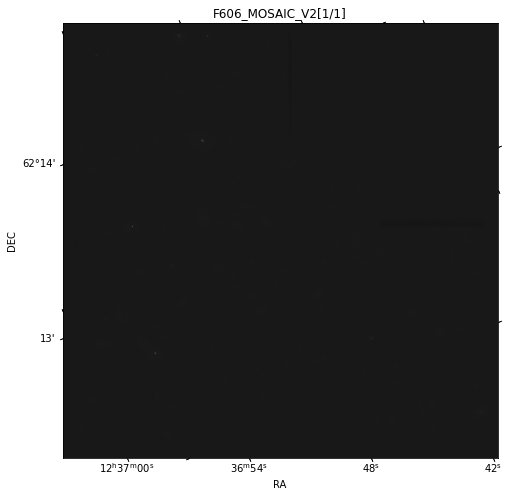

In [26]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(image_data, cmap='gray',origin='lower')
ax.set_title(image_header['OBJECT'])
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
plt.show()

How comes it is all black?

Let's check the pixels.

In [27]:
flattened = image_data.flatten()
mean = np.mean(flattened) 
std = np.std(flattened)
print(mean,std)


-2.5088528e-05 0.0011860739


(array([8.0300000e+02, 7.5800000e+02, 7.1900000e+02, 7.4400000e+02,
        8.0700000e+02, 7.8200000e+02, 8.3200000e+02, 8.1200000e+02,
        8.4500000e+02, 8.1900000e+02, 7.3400000e+02, 8.2800000e+02,
        9.4000000e+02, 8.7600000e+02, 9.0900000e+02, 1.0130000e+03,
        9.7200000e+02, 1.2100000e+03, 1.0530000e+03, 1.2820000e+03,
        1.0990000e+03, 1.2520000e+03, 1.2760000e+03, 1.2890000e+03,
        1.0000000e+03, 9.4100000e+02, 7.5400000e+02, 6.4200000e+02,
        7.2100000e+02, 7.2400000e+02, 9.1700000e+02, 1.1240000e+03,
        1.3610000e+03, 1.5040000e+03, 1.7810000e+03, 1.7290000e+03,
        1.6950000e+03, 1.7390000e+03, 1.6930000e+03, 1.8060000e+03,
        1.7010000e+03, 1.6260000e+03, 1.6280000e+03, 2.3590000e+03,
        3.5810000e+03, 4.9300000e+03, 8.7100000e+03, 3.1195000e+04,
        5.0558100e+05, 1.1410253e+07, 4.0110440e+06, 3.4518800e+05,
        9.8789000e+04, 5.1834000e+04, 3.2935000e+04, 2.3338000e+04,
        1.7491000e+04, 1.3115000e+04, 1.0501000e

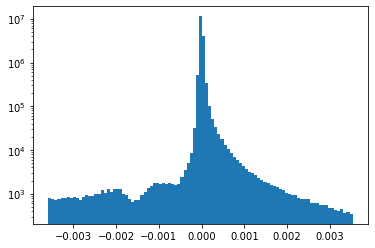

In [28]:
plt.hist(flattened,bins=np.linspace(mean-3*std,mean+3*std,100),log=True)


Note that the mean of the pixels is about zero and the standard deviation is 0.001 counts.

We can now try to plot but reducing the range of the image between the mean plus or minus the standard deviation.

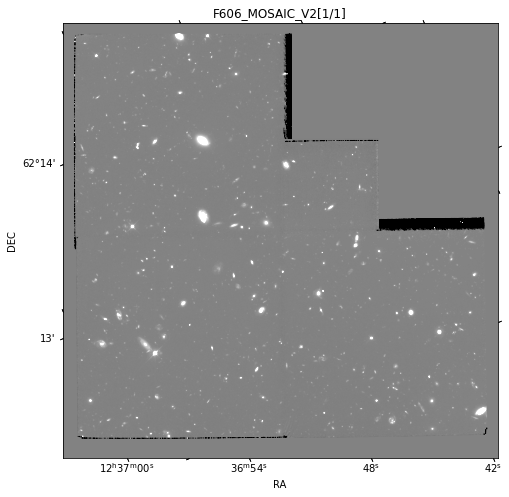

In [29]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(image_data, cmap='gray',origin='lower',vmin=mean-std,vmax=mean+std)
ax.set_title(image_header['OBJECT'])
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
plt.show()

From now on, remember that you are dealing with a matrix.

Have fun!